##  About Dataset
Context
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer-valued from 0 (no presence) to 4.

Acknowledgements
Creators:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., PhD.
Donor:
David W. Aha (aha '@' ics.uci.edu) (714) 856-8779

Inspiration
Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).


## Heart Disease Introduciton.
"Heart disease is a general term for ailments that affect the heart and circulatory system. Cardiovascular illnesses are another name for them. Around the world, it is a significant contributor to disability. Since the heart is one of the most important organs in the body, ailments that affect it also impact other organs and other parts of the body. Heart disorders can take many different shapes and forms. The most frequent ones result in heart failure and heart attacks by causing constriction or blockage of the coronary arteries, heart valve problems, enlargement of the heart, and other symptoms."
 

# Improting libraries .

In [1]:
#libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.ipynb_checkpoints', 'heart.csv', 'Heart_Disease_Prediction_Using_Machine_Learning.ipynb', 'README.md', 'requirements.txt']


# Load Dataset

In [2]:
dataset = pd.read_csv("heart.csv")

In [3]:
type(dataset)

pandas.core.frame.DataFrame

In [4]:
# shape of dataset
dataset.shape

(303, 14)

In [5]:
#dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


###### From the above information we can see that there is no null value in the dataset.

### Columns of our dataset

In [6]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]

# for loop to print columns of our dataset
for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


## Target variable analysis.

In [7]:
dataset["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

#### The above information shows clearly, this is a classification problem, with the target variable having values '0' and '1' 

### Checking correlation between columns. 

In [8]:
print(dataset.corr()["target"].abs().sort_values())

fbs         0.028046
chol        0.085239
restecg     0.137230
trestbps    0.144931
age         0.225439
sex         0.280937
thal        0.344029
slope       0.345877
ca          0.391724
thalach     0.421741
oldpeak     0.430696
cp          0.433798
exang       0.436757
target      1.000000
Name: target, dtype: float64


##### The above result shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.


### Exploratory Data Analysis (EDA)

1    165
0    138
Name: target, dtype: int64


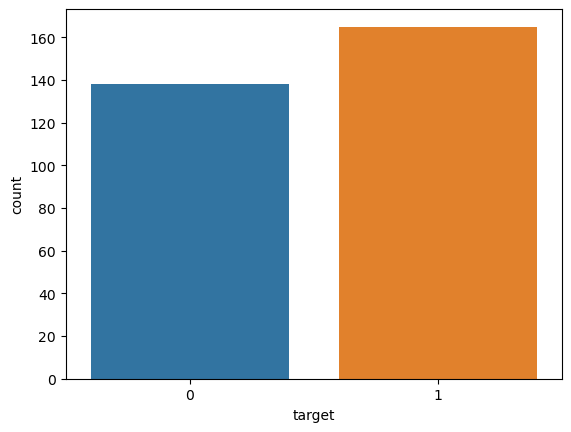

In [9]:
y = dataset["target"]

sns.countplot(y)

target_temp = dataset.target.value_counts()

print(target_temp)

In [10]:
## percentages of heart patients
print("Percent of patients with healthy hearts: "+str(round(target_temp[0] * 100/303,4 )))
print("Percent of people with heart problems: "+str(round(target_temp[1] * 100/303,4 )))

Percent of patients with healthy hearts: 45.5446
Percent of people with heart problems: 54.4554


## Analysis of 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal' features.

## Sex 

In [11]:
# Lets check the uniqeue features of "Sex"
dataset["sex"].unique()

array([1, 0], dtype=int64)

<AxesSubplot:xlabel='sex', ylabel='target'>

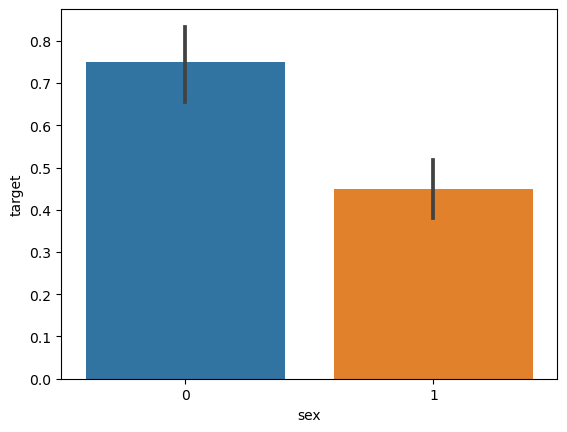

In [12]:
# Now lets visualize the information on bargraph
sns.barplot(dataset["sex"],y)

##### From the above bargraph we cah see that females are more likely to suffer form heart diseases. 

## Chest Pain Analysis 

In [13]:
#Chest pain type feature analysis
dataset["cp"].unique()

array([3, 2, 1, 0], dtype=int64)

<AxesSubplot:xlabel='cp', ylabel='target'>

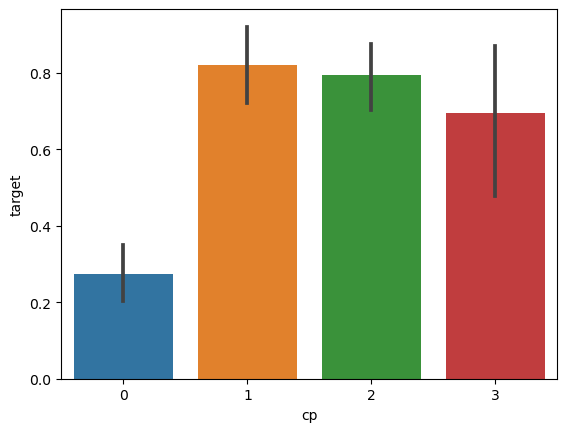

In [14]:
# barchart according to chest pain type.
sns.barplot(dataset["cp"],y)

##### The CP feature has values ranging from 0 to 3, as expected. We can see from the above chart that those with usual angina, or chest pain with a value of "0," are considerably less likely to have heart problems. 

##  Analysing the fasting blood sugar(FBS) feature. 

In [15]:
# analysis of fbs
dataset["fbs"].unique()

array([1, 0], dtype=int64)

<AxesSubplot:xlabel='fbs', ylabel='target'>

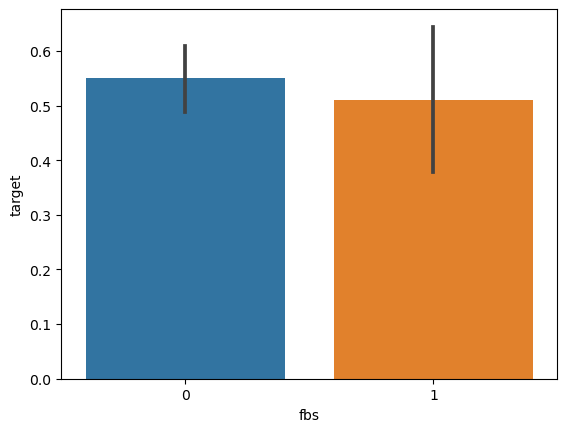

In [16]:
# bargraph of fbs
sns.barplot(dataset["fbs"],y)

###### The above bar chart shwo a small difference between "0" and "1".


## Analysis of 'restecg'

In [17]:
# restecg(maximum heart rate achieved)
dataset["restecg"].unique()

array([0, 1, 2], dtype=int64)

<AxesSubplot:xlabel='restecg', ylabel='target'>

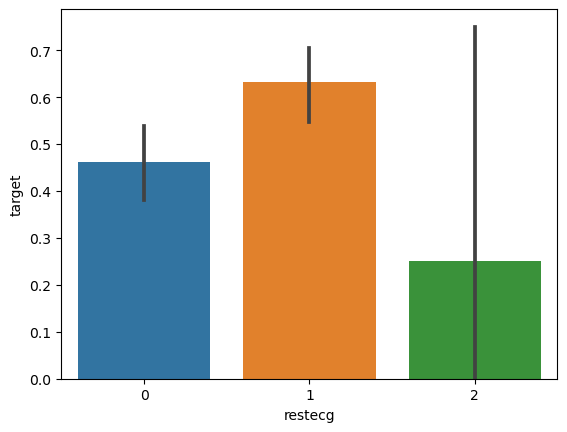

In [18]:
# bar graph for maximum heart rate achived
sns.barplot(dataset["restecg"],y)

##### We can see from the above chart that individuals with restecgs of 1 and 0 are far more likely to have heart disease than those with restecgs of 2 do.

## Analysing the 'exang' feature

In [19]:
#  exercise induced angina(exang)
dataset["exang"].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='exang', ylabel='target'>

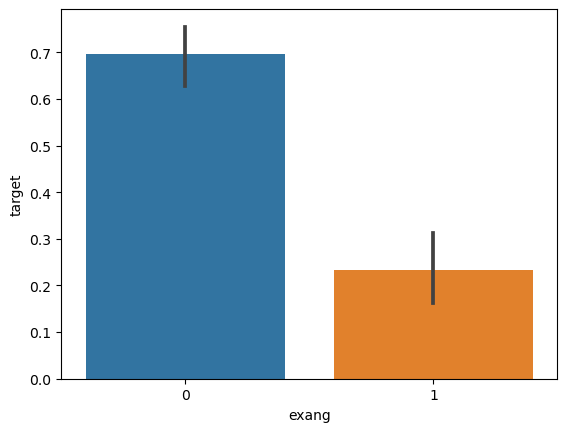

In [20]:
# bargraph for exercise induced angina 
sns.barplot(dataset["exang"],y)

### According to the above bar graph, those with exang=1, i.e.  exercise-induced angina, are significantly less likely to get heart problems, but those with exang = 0 are more likely to develop heart disease.

## Analysing 'Slope'(the slope of the peak exercise ST segment)


In [21]:
dataset["slope"].unique()

array([0, 2, 1], dtype=int64)

<AxesSubplot:xlabel='slope', ylabel='target'>

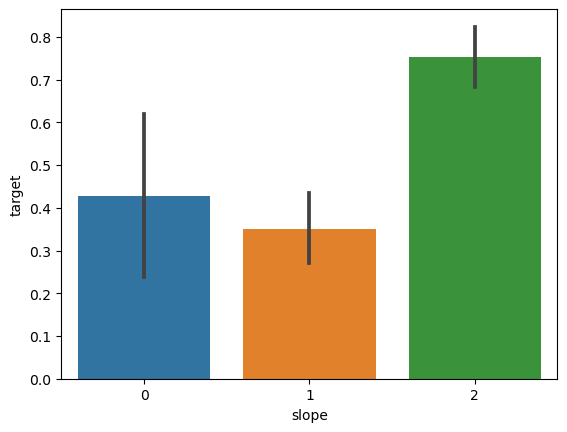

In [22]:
# plotting slope to bargraph
sns.barplot(dataset["slope"],y)

#### From the bar graph we can clearly observe, that Slope '2' causes much heart  pain rather  than Slope '0' and '1'.


## Analysing 'ca'(number of major vessels (0-3) colored by flourosopy)

In [23]:
#number of major vessels (0-3) colored by flourosopy
dataset["ca"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

<AxesSubplot:xlabel='ca', ylabel='target'>

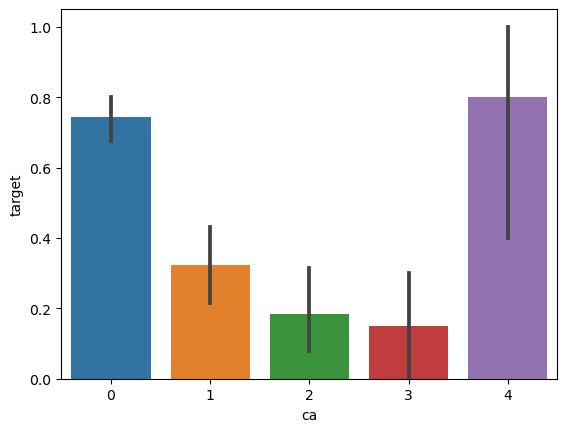

In [24]:
#barchart for ca
sns.barplot(dataset["ca"],y)

#### The barchart above shows that patients with ca "4" have an incredibly high rate of heart issues.

## Analysing the 'thal' feature

In [25]:
dataset["thal"].unique()

array([1, 2, 3, 0], dtype=int64)

<AxesSubplot:xlabel='thal', ylabel='target'>

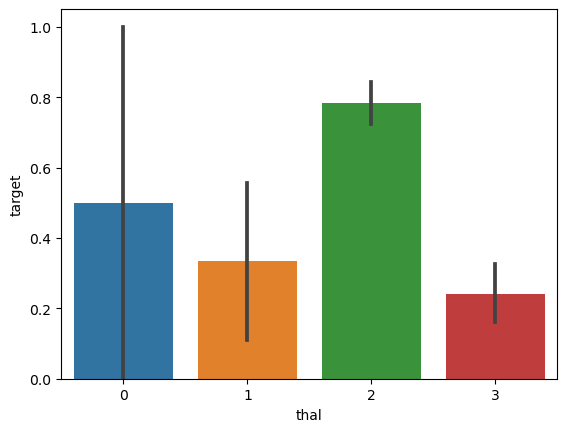

In [26]:
sns.barplot(dataset["thal"],y)

<AxesSubplot:xlabel='thal', ylabel='Density'>

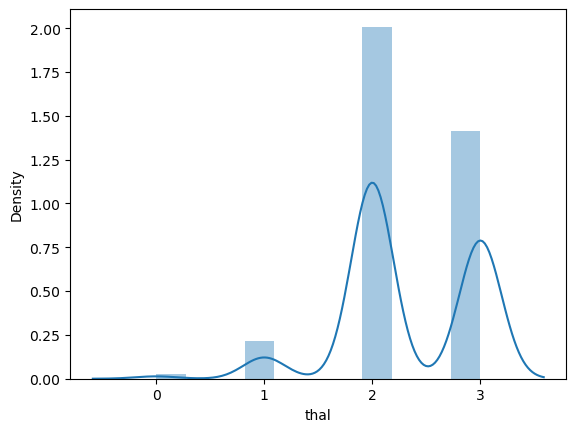

In [27]:
sns.distplot(dataset["thal"])

## Train Test split


In [28]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [29]:
X_train.shape

(242, 13)

In [30]:
X_test.shape

(61, 13)

In [31]:
Y_train.shape

(242,)

In [32]:
Y_test.shape

(61,)

## Model fitting

In [33]:
from sklearn.metrics import accuracy_score

## Logistic Regression


In [34]:
# import LogisticRegression.
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train,Y_train)
Y_pred_logistic_regression = logistic_regression.predict(X_test)

In [35]:
Y_pred_logistic_regression.shape

(61,)

In [36]:
score_logistic_regression = round(accuracy_score(Y_pred_logistic_regression,Y_test)*100,3)
print("The accuracy score obtained through the use of Logistic Regression is: "+str(score_logistic_regression)+" %")

The accuracy score obtained through the use of Logistic Regression is: 85.246 %


## Decision Tree


In [37]:
#importing DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0

for x in range(200):
    decision_tree = DecisionTreeClassifier(random_state=x)
    decision_tree.fit(X_train,Y_train)
    Y_pred_decision_tree = decision_tree.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_decision_tree,Y_test)*100,3)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

decision_tree = DecisionTreeClassifier(random_state=best_x)
decision_tree.fit(X_train,Y_train)
Y_pred_decision_tree = decision_tree.predict(X_test)

In [38]:
print(Y_pred_decision_tree.shape)

(61,)


In [39]:
score_decision_tree = round(accuracy_score(Y_pred_decision_tree,Y_test)*100,2)
print("The accuracy score obtained through the use of Decision Tree is: "+str(score_decision_tree)+" %")

The accuracy score obtained through the use of Decision Tree is: 81.97 %


## Support Vector Machines (SVM) 

In [40]:
# import svm
from sklearn import svm
svm = svm.SVC(kernel='linear')
svm.fit(X_train, Y_train)
Y_pred_svm = svm.predict(X_test)

In [41]:
Y_pred_svm.shape

(61,)

In [42]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,3)
print("The accuracy score obtained through the use of SVM is: "+str(score_svm)+" %")

The accuracy score obtained through the use of SVM is: 81.967 %


## Random Forest.

In [43]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    random_forest = RandomForestClassifier(random_state=x)
    random_forest.fit(X_train,Y_train)
    Y_pred_random_forest = random_forest.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_random_forest,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        

random_forest = RandomForestClassifier(random_state=best_x)
random_forest.fit(X_train,Y_train)
Y_pred_random_forest = random_forest.predict(X_test)

In [44]:
Y_pred_random_forest.shape

(61,)

In [45]:
score_random_forest = round(accuracy_score(Y_pred_random_forest,Y_test)*100,3)

print("The accuracy score obtained through the use of Random Forest is: "+str(score_random_forest)+" %")

The accuracy score obtained through the use of Random Forest is: 90.164 %


## classificaiton report of Random Forest

In [46]:
from sklearn.metrics import classification_report

# Calculate and print classification report
report = classification_report(Y_test, Y_pred_random_forest)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        27
           1       0.89      0.94      0.91        34

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



# Confusion Matrix. 

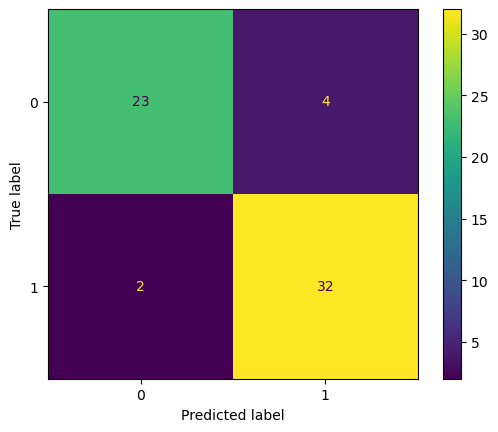

In [47]:
from sklearn.metrics import plot_confusion_matrix

# Plot the confusion matrix
plot_confusion_matrix(random_forest, X_test, Y_test)

## Final Output.

In [48]:
# accuracy score for diffrent algorithms
scores = [score_logistic_regression,score_svm,score_decision_tree,score_random_forest]
algorithms = ["Logistic Regression","Support Vector Machine","Decision Tree","Random Forest"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 85.246 %
The accuracy score achieved using Support Vector Machine is: 81.967 %
The accuracy score achieved using Decision Tree is: 81.97 %
The accuracy score achieved using Random Forest is: 90.164 %


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

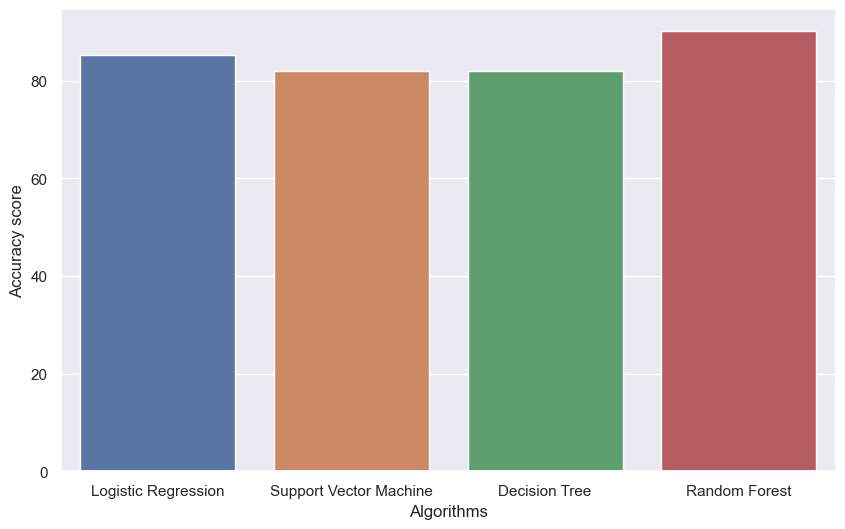

In [49]:
sns.set(rc={'figure.figsize':(10,6)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

###### From the final output of the prototype Random forest have the highest accuracy score 90.164 among the four algorithm for heart disease prediction. 